<a href="https://colab.research.google.com/github/mca2309/OCR-using-OpenCV-and-Tensorflow-with-GUI/blob/R1/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [27]:
import numpy as np
import cv2
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from os.path import exists

# Data Preprocessing

In [2]:
# load dataset
(trainX, trainY), (testX, testY) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# load train and test dataset
# reshape dataset to have a single channel
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))
# one hot encode target values
trainY = to_categorical(trainY)
testY = to_categorical(testY)

In [4]:
# scale pixels
train_norm = trainX.astype('float32')
test_norm = testX.astype('float32')
# normalize to range 0-1
train_norm = train_norm / 255.0
test_norm = test_norm / 255.0
# return normalized images
trainX = train_norm
testX = test_norm

# Creating a CNN



In [5]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

In [6]:
# compile model
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
# fit our model
history = model.fit(trainX, trainY, epochs=10, validation_data=(testX, testY))
# save our model
model.save('mnist_cnn.h5')

Epoch 1/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.1479 - accuracy: 0.9554 - val_loss: 0.0639 - val_accuracy: 0.9789
Epoch 2/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0502 - accuracy: 0.9848 - val_loss: 0.0505 - val_accuracy: 0.9830
Epoch 3/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0326 - accuracy: 0.9899 - val_loss: 0.0466 - val_accuracy: 0.9845
Epoch 4/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0208 - accuracy: 0.9936 - val_loss: 0.0396 - val_accuracy: 0.9872
Epoch 5/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.0131 - accuracy: 0.9963 - val_loss: 0.0417 - val_accuracy: 0.9871
Epoch 6/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0082 - accuracy: 0.9980 - val_loss: 0.0362 - val_accuracy: 0.9884
Epoch 7/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0060 - accuracy: 0.9987 - val_loss: 0.0398 -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [8]:
model = keras.models.load_model("mnist_cnn.h5")

In [9]:
model.evaluate(testX, testY)
predY = model.predict(testX)
predY.shape

313/313 [==============================] - 2s 7ms/step


(10000, 10)

In [10]:
y_predicted = []

for arr in predY:
    if arr[0] <= 0.5:
        y_predicted.append(0)
    else:
        y_predicted.append(1)

y_predicted = np.array(y_predicted)

In [23]:
# Convert predicted probabilities to one-hot encoded format
y_predicted = np.argmax(predY, axis=1)

# printing the classification report
print(classification_report(np.argmax(testY, axis=1), y_predicted))


              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



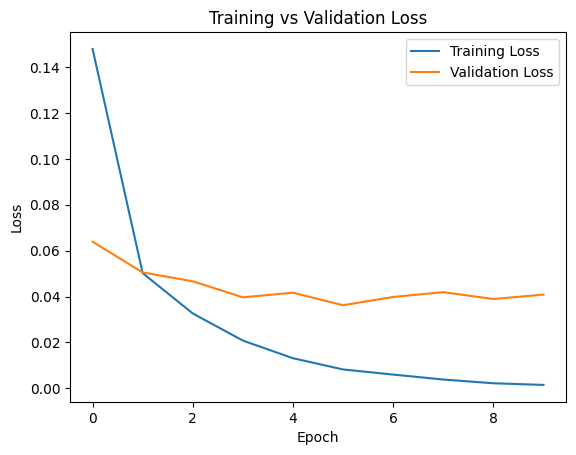

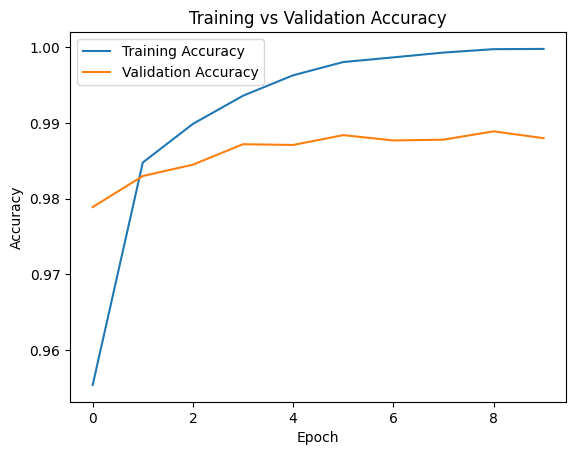

In [25]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

# Plot the training and testing accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

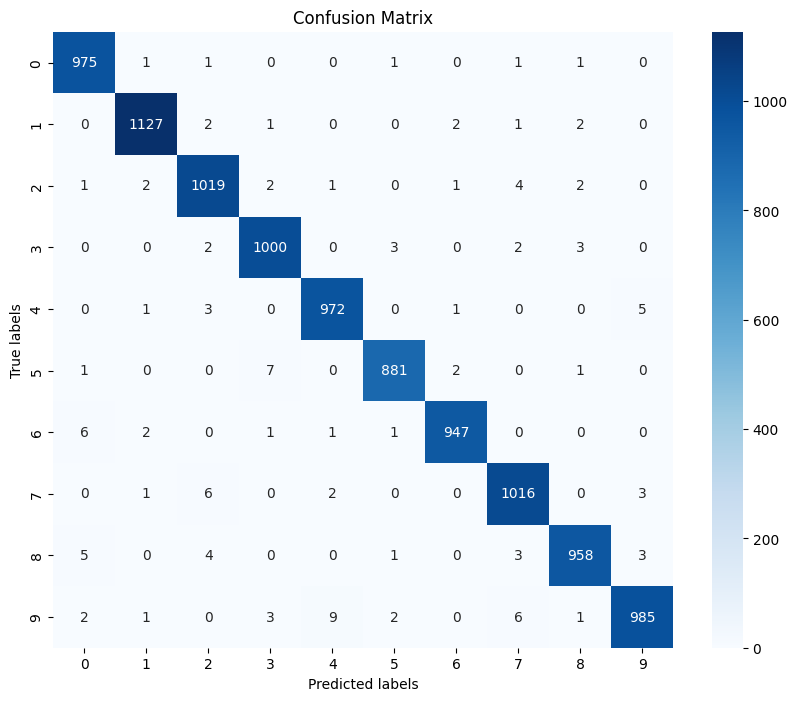

In [28]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(np.argmax(testY, axis=1), y_predicted)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
